# Clase 23: EDOs - EDOs de alto orden, estabilidad

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sistemas de ecuaciones diferenciales

Podemos aplicar todo lo que hemos estudiado a sistemas de ecuaciones del tipo

$$
\begin{align}
y_1'(t) &= f_1(t, y_1, y_2, ..., y_n) \\
y_2'(t) &= f_2(t, y_1, y_2, ..., y_n) \\
\vdots &\phantom{=}\quad \vdots \\
y_n'(t) &= f_n(t, y_1, y_2, ..., y_n)
\end{align}
$$

para $a \leq t \leq b$ con condiciones iniciales

$$
y_1(a) = \alpha_1\,,\quad y_2(a) = \alpha_2\,,\quad ...\,, \quad y_n(a) = \alpha_n\,.
$$

En los desarrollos teóricos sólo tenemos que generalizar la condición de Lipfschitz

$$
|f(t, u_1, ..., u_n) - f(t, w_1, ..., w_n)| \leq L \sum_{j = 1}^n |u_j - w_j|
$$

Que se cumple siempre que 

$$
\left|\frac{\partial f}{\partial u_i}\right| \leq L
$$

para todo $u_i$. Cuando se satisface esta condición de Lpfschitz, el sistema tene una solución única.

Generalizar los métodos ya vistos es directo.

In [2]:
def rk4s(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    m = len(yo)
    ts = np.zeros(N+1)
    sol = np.zeros((m,N+1))
    
    for i in range(N):
        ts[i] = t
        sol[:,i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        
    ts[N] = t
    sol[:,N] = w
    
    return ts, sol

## Ecuaciones de alto orden

Con lo visto arriba, una ecuación de alto orden es fácil de resolver, consideremos

$$
y''(t) = f(t, y, y') \,,\quad a \leq t \leq b\,,\quad y(a) = y_o\,,\quad y'(a) = y'_o\,,
$$

este se puede transformar en un sistema haciendo $y_1 = y$, $y_2 = y'$.

$$
\begin{align}
y_1'(t) &= y_2 \\
y_2'(t) &= f(t, y_1, y_2) \,.
\end{align}
$$

Similarmente para ecuaciones de orden más alto.

Resolvamos el siguiente problema de valor inicial

$$
y''(t) - 2y'(t) + 2y(t) = e^{2t}\sin(t)\,,\quad 0\leq t\leq 1\,,\quad y(0) = -0.4\,,\quad y'(0)= -0.6
$$

In [3]:
def f(t, y):
    return np.array([y[1], 2*y[1] - 2*y[0] + np.exp(2*t)*np.sin(t)])

a = 0
b = 1
yo = np.array([-0.4, -0.6])

In [4]:
rk4s(f, a, b, yo, 10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([[-0.4       , -0.46173334, -0.52555988, -0.58860144, -0.64661231,
         -0.69356666, -0.7211519 , -0.71815295, -0.66971133, -0.5564429 ,
         -0.35339886],
        [-0.6       , -0.63163124, -0.64014895, -0.61366381, -0.53658203,
         -0.3887381 , -0.14438087,  0.22899702,  0.7719918 ,  1.53478148,
          2.57876634]]))

In [5]:
def exacta(t):
    return 0.2*np.exp(2*t)*(np.sin(t) - 2*np.cos(t))

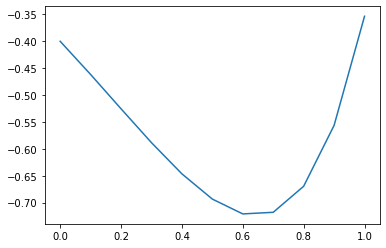

In [6]:
sol = rk4s(f, a, b, yo, 10)
plt.plot(sol[0], sol[1][0])

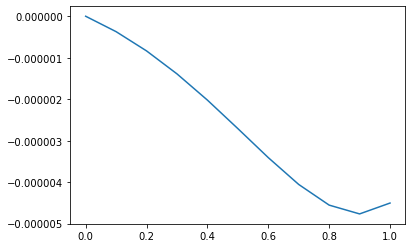

In [7]:
plt.plot(sol[0], sol[1][0] - exacta(sol[0]))

## Estabilidad

Hasta ahora hemos discutido el error cometido a cada paso. Pero nos preocupa que el error total al $N$-ésimo paso pueda ser grande (y de hecho hemos visto casos donde lo es), ya que un pequeño error en un paso puede llevar a errores grandes si el método no es estable.

Un método se dice **consistente** si todos los errores tienden a cero cuando el tamaño del paso tiende a cero

$$
\lim_{h\rightarrow 0} \max_{1 \leq i \leq N}|\tau_i(h)| = 0\,.
$$

Un método se dice **convergente** si la aproximación tiende a la verdadera solución cuando el tamaño del paso tiende a cero

$$
\lim_{h\rightarrow 0} \max_{1 \leq i \leq N}|y(t_i) - w_i| = 0\,.
$$

Por ejemplo el método de Euler es convergente porque la fórmula de error es

$$
\frac{hM}{2L}(e^{L(t_i - a)} - 1)
$$

tal que tiende a cero cuando $h$ tiende a cero.

**Teorema:** Considere el problema de condición inicial

$$
y'(t) = f(t, y)\,,\quad a \leq t \leq b \,,\quad y(a) = \alpha\,,
$$

que se aproxima usando el método dado por

$$
w_{i+1} = w_i + h\phi(t_i, w_i, h)\,,
$$

si $\phi$ satisface la condición de Lipfshitz en el conjunto $\{(t, w, h) | a \leq t \leq b\,,\, -\infty \leq w \leq \infty\,,\, 0\leq h \leq h_o \}$ entonces

1. El método es estable (pequeñas perturbaciones en la condición inicial implican pequeñas perturbaciones en la solución).

2. El método es convergente si y sólo si es consistente, lo que es equivalente a la condición $\phi(t, y, 0) = f(t, y)$.

3. Si una función $\tau(h)$ existe tal que para cada paso el error de truncación local satisface $|\tau_i(h)| \leq \tau(h)$ cuando $0 \leq h \leq h_o$, entonces

$$
|y(t_i) - w_i| \leq \frac{\tau(h)}{L}e^{L(t_i - a)}\,.
$$

Un análisis similar para métodos de múltiples pasos se puede encontrar en el libro de Burden.

## Ecuaciones diferenciales rígidas

In [8]:
def f(t, y):
    return np.array([9*y[0] + 24*y[1] + 5*np.cos(t) - (1/3)*np.sin(t),
                    -24*y[0] - 51*y[1] - 9*np.cos(t) + (1/3)*np.sin(t)])

yo = np.array([4/3, 2/3])
a = 0
b = 1

In [9]:
def exacta(t):
    return [2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t), 
            -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)]

In [10]:
sol_10 = rk4s(f, a, b, yo, 10)
sol_20 = rk4s(f, a, b, yo, 20)

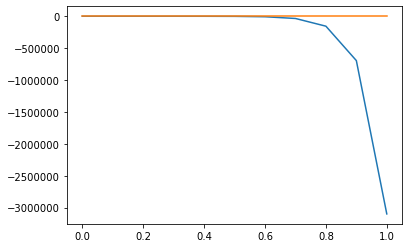

In [11]:
plt.plot(sol_10[0], sol_10[1][0] - exacta(sol_10[0])[0])
plt.plot(sol_20[0], sol_20[1][0] - exacta(sol_20[0])[0])

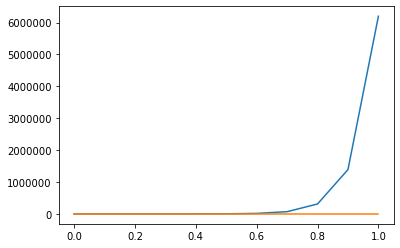

In [12]:
plt.plot(sol_10[0], sol_10[1][1] - exacta(sol_10[0])[1])
plt.plot(sol_20[0], sol_20[1][1] - exacta(sol_20[0])[1])

Lo que está pasando aquí es que en la solución analítica aparece el término $e^{-39t}$ que tiende rápidamente a cero. Pero sus derivadas son grandes, tal que el error de un método de alto orden, como el Runge-Kutta, puede ser grande y necesario escoger un $h$ que lo compense. Este tipo de ecuaciones se llaman **rígidas**.

Para evaluar la utilidad de un método para resolver ecuaciones rígidas se puede considerar la ecuación más sencilla

$$
y'(t) = \lambda y(t)\,,\quad y(0) = \alpha\,,\quad \lambda < 0.
$$

Por ejemplo, para el método de Euler, el error absoluto al $j$-ésimo paso está dado por

$$
|y(t_j) - w_j| = |e^{j\lambda h} - (1 + h\lambda)^j||\alpha| 
$$

tal que la convergencia del método dependerá de cómo $(1 + h\lambda)$ aproxima la función $e^{h\lambda}$. Para $j$ grande $e^{jh\lambda}$ tiende rápidamente a cero, pero esto sólo será verdad para $(1 + h\lambda)^j$ si $|1 + h\lambda| < 1$ tal que es necesario tomar $0 < h < 2/|\lambda|$.

En general un método de un paso, la aproximación se puede escribir

$$
w_{j+1} = Q(h\lambda)w_j
$$

para alguna función $Q$ y será estable si se escoge el paso $h$ tal que

$$
|Q(h\lambda)| < 1.
$$

Una alternativa es buscar métodos que sean estables para $\lambda < 0$ y cualquier $h$. O mejor aún para $\text{Re} \lambda < 0$. A los métodos que satisfacen esta segunda condición se los llama A-estables. Un método A-estable es el método implícito dado por la regla del trapecio

$$
\begin{align}
w_o &= \alpha \\
w_{j+1} &= w_j + \frac{h}{2} (f(t_{j+1}, w_{j+1}) + f(t_j, w_j))\,,
\end{align}
$$

el problema es que se necesita saber $w_{j+1}$ que requiere despejar esta ecuación. Para ese despeje se puede usar el método de Newton.

In [100]:
class MaxIterations(Exception):
    pass

def tn(f, df, a, b, yo, tol, N, M = 1000):
    
    h = (b - a)/N
    t = a
    w = yo
    
    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    ws[0] = w
    ts[0] = t
    
    for i in range(N):
        k1 = w + h*f(t, w)/2
        wo = k1
        
        j = 1
        while True:
            w = wo - (wo - h*f(t + h, wo)/2 - k1)/(1 - h*df(t + h, wo)/2)
            if abs(w - wo) < tol:
                break
            else:
                j = j+1
                wo = w
                if j > M:
                    raise MaxIterations('Se excedió el número máximo de iteraciones')
        
        t += h
        ts[i+1] = t
        ws[i+1] = w
        
    return ts, ws

Resolvamos el problema 

$$
y'(t) = 5e^{5t}(y - t)^2 - 1\,,\quad 0\leq t\leq 1\,,\quad y(0) = -1\,.
$$

La solución analítica es $y(t) = t - e^{-5t}$.

In [101]:
def f(t, y):
    return 5*np.exp(5*t)*(y - t)**2 - 1

def df(t, y):
    return 10*np.exp(5*t)*(y - t)

a = 0
b = 1
yo = -1

def exacta(t):
    return t - np.exp(-5*t)

In [102]:
def rk4(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [103]:
sol_rk4_5 = rk4(f, a, b, yo, 5)
sol_rk4_20 = rk4(f, a, b, yo, 20)
sol_tn_5 = tn(f, df, a, b, yo, 1e-6, 5)
sol_tn_20 = tn(f, df, a, b, yo, 1e-6, 20)

In [104]:
exacta(sol_rk4_5[0])

array([-1.        , -0.16787944,  0.26466472,  0.55021293,  0.78168436,
        0.99326205])

In [105]:
sol_rk4_5

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([-1.00000000e+000, -3.58615674e-001,  1.83292601e-001,
         1.41234549e+000,  5.67600244e+015,  2.94453567e+275]))

In [106]:
sol_tn_5

(array([-1. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 array([-1.        , -0.32515935,  0.12634786,  0.44482793,  0.70962255,
         0.94633261]))

In [107]:
exacta(sol_rk4_20[0])

array([-1.        , -0.72880078, -0.50653066, -0.32236655, -0.16787944,
       -0.0365048 ,  0.07686984,  0.17622606,  0.26466472,  0.34460078,
        0.417915  ,  0.48607214,  0.55021293,  0.61122579,  0.66980262,
        0.72648225,  0.78168436,  0.83573577,  0.888891  ,  0.9413483 ,
        0.99326205])

In [108]:
sol_rk4_20

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([-1.        , -0.80690858, -0.62937   , -0.46857821, -0.32416489,
        -0.19475982, -0.07848497,  0.02667647,  0.12264169,  0.21109906,
         0.29345978,  0.37086223,  0.44420564,  0.51419443,  0.58138089,
         0.64619865,  0.70898195,  0.76995827,  0.82915925,  0.88599789,
         0.93870176]))

In [109]:
sol_tn_20

(array([-1.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 array([-1.        , -0.80709301, -0.62950844, -0.46857579, -0.3240176 ,
        -0.19450837, -0.07818057,  0.02699155,  0.12294135,  0.21137304,
         0.29370967,  0.37109688,  0.44443764,  0.5144387 ,  0.58165595,
         0.64653193,  0.70942415,  0.77062537,  0.83037797,  0.88888453,
         0.94631557]))

Un método muy usado para tratar ecuaciones rígidas usan lo que se llama "diferencias hacia atrás" (backward difference) de orden $s$. La lógica es resolver una ecuación explícita del estilo

$$
\sum_{k = 0}^s a_k y_{i + k} = h\beta f(t, y_{i + s})
$$

Para encontrar los coeficientes $\beta$ y $a_k$ se escribe

$$
y'(t_{i+s}) = P_s(t_{i+s})
$$

donde $P_s(t)$ es el polinomio interpolante de Lagrange que usa los puntos $(t_i, y_i), ..., (t_{i+s}, y_{i+s})$ para aproximar $f(t_{i+s}, y(t_{i + s}))$. 

Esto da:

$$
\begin{align}
y_{i + 1} - y_{i} &= hf(t_{i+1}, y_{i+1})\,,\\
y_{i+1} - \frac{4}{3}y_i + \frac{1}{3}y_{i - 1} &= \frac{2}{3}hf(t_{i+1}, y_{i+1}) \,,\\
y_{i+1} - \frac{18}{11}y_{i} + \frac{9}{11}y_{i-1} - \frac{2}{11}y_{i-2} &= \frac{6}{11}hf(t_{i+1}, y_{i+1})\,.
\end{align}
$$

## Scipy

Como siempre, ejemplos copiados de la documentación de scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

Scipy puede usar varios métodos: 

- El método por defecto es el RK45 que es el Runge-Kutta-Fehlberg. Cuando se pide 'dense output' usa un polinomio interpolante de orden 4.

- El método RK23 usa un Runge-Kutta de orden 2 para el control de error. El polinomio interpolante es un Hermiite.

- El método BDF es un tipo de método de diferencias hacias atrás, pero con control de error y orden variable. Ideal para ecuaciones rígidas.

- El método LSODA es un método de Adams que detecta cuándo una ecuación es rígida y cambia hacia un método de diferencias hacia atrás. No lo recomiendan en la documentación ya que el código usa un pedazo en Fortran envuelto en Python... (tal vez no es fácil de editar o tal vez no es eficiente, no lo especifican).

Usa otros métodos que también son combinaciones de cosas que hemos visto en la clase. 

        scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

In [23]:
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])

In [24]:
print(sol.t)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]


In [25]:
print(sol.y)

[[2.         1.88836035 1.06327177 0.43319312 0.18017253 0.07483045
  0.03107158 0.01350781]
 [4.         3.7767207  2.12654355 0.86638624 0.36034507 0.14966091
  0.06214316 0.02701561]
 [8.         7.5534414  4.25308709 1.73277247 0.72069014 0.29932181
  0.12428631 0.05403123]]


In [26]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

In [27]:
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)

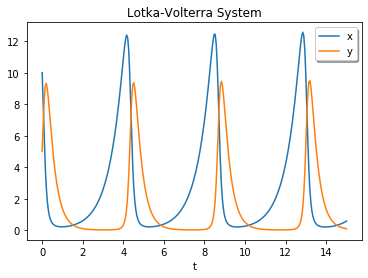

In [28]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

## Tareas

### Tarea 12.1

Estudiemos el péndulo rígido. Sabemos que la aceleración actúa en la componente vertical de la velocidad y que además debe satisfacer la ecuación de ligadura que el radio del movimiento sea constante. Esto lleva a la siguiente ecuación diferencial

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin\theta
$$

donde $g = 9.81\,\text{m}/\text{s}^2$ es la aceleración de la gravedad y $L = 1\,\text{m}$ es la longitud del péndulo.

Grafique la solución a esta ecuación tomando $\theta'(0) = 0$ para $\theta(0) = 0.1$, $\theta(0) = 1$,  $\theta(0) = 3$ entre $0\,\text{s} \leq t \leq 6\,\text{s}$. Compare con el caso de pequeñas oscilaciones ($\sin\theta \approx \theta$).

In [29]:
g = 9.81 # m/s^2
L = 1 # m
def f(t, y):
    return np.array([y[1], -(g/L)*np.sin(y[0])])

a = 0
b = 6

def peque(t, yo):
    omega = np.sqrt(g/L)
    return yo*np.cos(omega*t)

In [30]:
ts = np.linspace(0, 6, 61)

sol1 = rk4s(f, a, b, np.array([0.1, 0]), 60)[1][0]
sol2 = rk4s(f, a, b, np.array([1, 0]), 60)[1][0]
sol3 = rk4s(f, a, b, np.array([3, 0]), 60)[1][0]

peque1 = peque(ts, 0.1)
peque2 = peque(ts, 1)
peque3 = peque(ts, 3)

Text(0, 0.5, '$\\theta$')

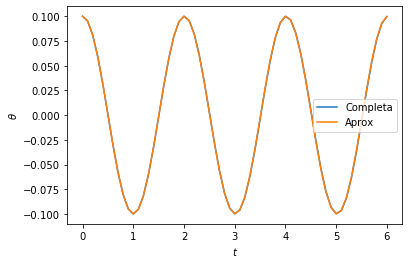

In [31]:
plt.plot(ts, sol1, label='Completa')
plt.plot(ts, peque1, label='Aprox')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$\\theta$')

Text(0, 0.5, '$\\theta$')

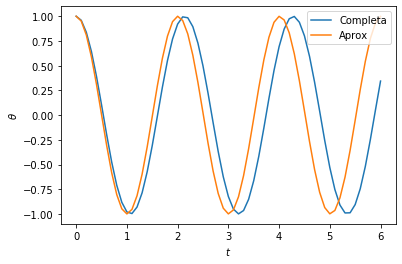

In [32]:
plt.plot(ts, sol2, label='Completa')
plt.plot(ts, peque2, label='Aprox')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$\\theta$')

Text(0, 0.5, '$\\theta$')

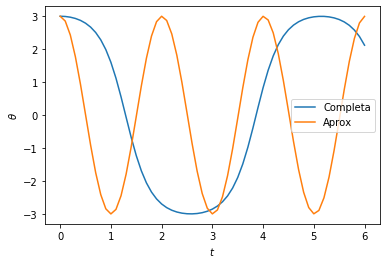

In [33]:
plt.plot(ts, sol3, label='Completa')
plt.plot(ts, peque3, label='Aprox')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$\\theta$')

### Tarea 12.2

Implemente un código para resolver una ecuación de orden $n$ usando el método de Runge-Kutta de orden 4. 

$$
y^{(n)}(t) = f(t, y, y',...,y^{(n-1)})\,,
$$

Este código debería recibir una función $f(t, y, y', ..., y^{(n-1)})$, los valores inical $a$ y final $b$ del parámetro $t$, junto con un arreglo de condiciones iniciales $(y(a),...,y^{(n-1)}(a))$ y el número de pasos. El código debe dar la solución $y(t_i)$.

Para probar que funciona, resuelva la siguiente ecuación diferencial

$$
y'' - 2y' + y = te^t - t\,,\quad 0\leq t\leq 1\,,\quad y(0) = y'(0) = 0\,.
$$

Esta tiene solución analítica $y(t) = (1/6)t^3e^t - te^t + 2e^t - t - 2$.

In [34]:
def rk4o(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    m = len(yo)
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    def g(t, w):
        res = np.zeros(m)
        res[:-1] = [w[i] for i in range(1,m)]
        res[-1] = f(t,w)
        return res
     
    for i in range(N):
        ts[i] = t
        sol[i] = w[0]
        k1 = h*g(t, w)
        k2 = h*g(t+h/2, w+k1/2)
        k3 = h*g(t+h/2, w+k2/2)
        k4 = h*g(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        
    ts[N] = t
    sol[N] = w[0]
    
    return ts, sol

In [35]:
def f(t, y):
    return t*np.exp(t) - t + 2*y[1] - y[0]

a = 0
b = 1
yo = np.zeros(2)

def exacta(t):
    return (1/6)*t**3*np.exp(t) - t*np.exp(t) + 2*np.exp(t) -  t - 2

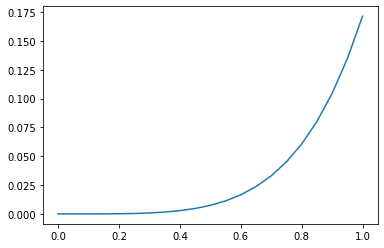

In [36]:
ts, sol = rk4o(f, a, b, yo, 20)
plt.plot(ts, sol)

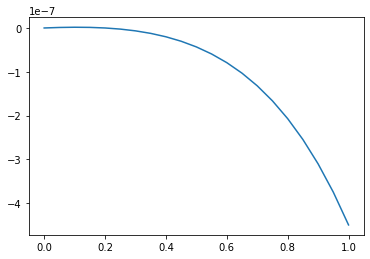

In [37]:
plt.plot(ts, sol - exacta(ts))

### Tarea 12.3

Así como implementamos el método de Runge Kutta de orden 4 para resolver sistemas de ecuaciones diferenciales, implemente el método de Runge Kutta Fehlberg para esos sistemas de ecuaciones. 

Note que para modificar el tamaño del paso es necesario exigir que todas las soluciones alcancen la tolerancia pedida.

Para probar su código, resuelva el siguiente problema de valor inicial:

$$
\begin{align}
y_1'(t) &= -4y_1 - 2y_2 + \cos t + 4 \sin t\,,\\
y_2'(t) &= 3y_1 + y_2 - 3\sin t\,,
\end{align}
$$

para $0 \leq t \leq 2$ con condiciones iniciales 

$$
y_1(0) = 0\,,\quad y_2(t) = -1\,.
$$

Este sistema tiene soluciones analíticas

$$
\begin{align}
u_1(t) &= 2e^{-t} - 2e^{-2t} + \sin t\,,\\
u_2(t) &= -3e^{-t} + 2e^{-2t}\,.
\end{align}
$$

In [38]:
class MinStep(Exception):
    pass

def rkfs(f, a, b, yo, tol, hmin, hmax):
    
    t = a
    w = yo
    h = hmax
    flag = 1
    
    m = len(yo)
    
    ts = [t]
    sol = [[w[i]] for i in range(m)]
    hs = []
    rs = []
    
    while flag:
        
        # Evaluaciones de la función 
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        
        # Estima del error dada por la diferencia entre dos RKs
        R = np.max(np.abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55))
        
        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            ts.append(t)
            for i in range(m):
                sol[i].append(w[i])
            hs.append(h)
            rs.append(R)
            
        # el 0.84 es un factor para hacer la estima más conservadora 
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)
        
        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax
        
        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')
            
    return np.array(ts), np.array(sol), np.array(hs), np.array(rs)

In [39]:
def f(t, y):
    return np.array([-4*y[0] -2*y[1] + np.cos(t) + 4*np.sin(t),
                    3*y[0] + y[1] - 3*np.sin(t)])

yo = np.array([0, -1])
a = 0
b = 2

tol = 1e-5
hmin = 0.001
hmax = 0.1

def exacta(t):
    return np.array([2*np.exp(-t) - 2*np.exp(-2*t) + np.sin(t),
                    -3*np.exp(-t) + 2*np.exp(-2*t)])

In [40]:
ts, sol, hs, rs = rkfs(f, a, b, yo, tol, hmin, hmax)

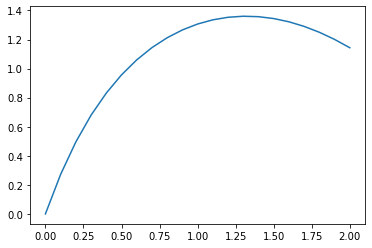

In [41]:
plt.plot(ts, sol[0])

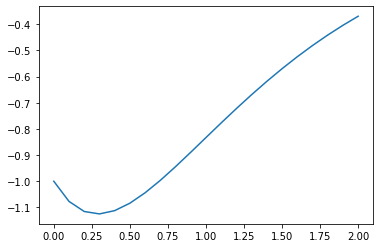

In [42]:
plt.plot(ts, sol[1])

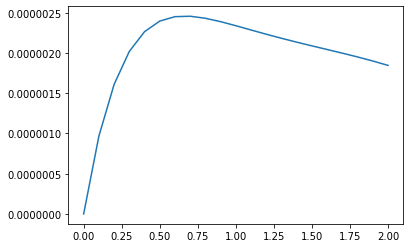

In [43]:
plt.plot(ts, sol[0] - exacta(ts)[0])

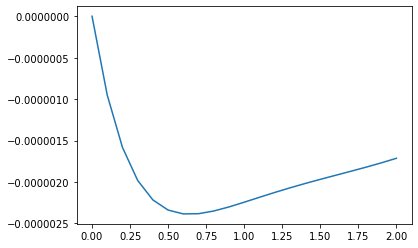

In [44]:
plt.plot(ts, sol[1] - exacta(ts)[1])

### Tarea 12.4

Escriba un código que implemente el algoritmo de diferencias hacia atrás

$$
y_{i+1} - \frac{18}{11}y_{i} + \frac{9}{11}y_{i-1} - \frac{2}{11}y_{i-2} = \frac{6}{11}hf(t_{i+1}, y_{i+1})
$$

como este es un método implícito, es necesario implementar un método de Newton similar a lo hecho para la regla del trapecio.

Aplique este algoritmo a la solución del problema visto en clase:

In [99]:
def f(t, y):
    return 5*np.exp(5*t)*(y - t)**2 - 1

def df(t, y):
    return 10*np.exp(5*t)*(y - t)

a = 0
b = 1
yo = -1

def exacta(t):
    return t - np.exp(-5*t)

In [123]:
class MaxIterations(Exception):
    pass

def rk4_step(f, fi, t, w, h):
    
    k1 = h*fi
    k2 = h*f(t+h/2, w+k1/2)
    k3 = h*f(t+h/2, w+k2/2)
    k4 = h*f(t + h, w + k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

def bde3(f, a, b, yo, tol, N, M=10000):
    
    h = (b-a)/N
    i = 0
    w = yo
    t = a
    
    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    fi = 0
    fim1 = 0
    fim2 = 0
    fim3 = 0
    
    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3 = fim2
        fim2 = fim1
        fim1 = fi
        fi = f(t,w)
        if i < 3:
            w += rk4_step(f, fi, t, w, h)
        else:
            k1 = (18/11)*w - (9/11)*ws[i-1] + (2/11)*ws[i-2]
            wo = w
            j = 0
            while True:
                w = wo - (wo - k1 - (6/11)*h*f(t+h, wo))/(1 - (6/11)*h*df(t+h, wo))
                if abs(w - wo) < tol:
                    break
                else:
                    j = j+1
                    wo = w
                    if j > M:
                        raise MaxIterations('Se excedió el número máximo de iteraciones')
        t += h
        
    ws[N] = w
    ts[N] = t
    
    return ts, ws

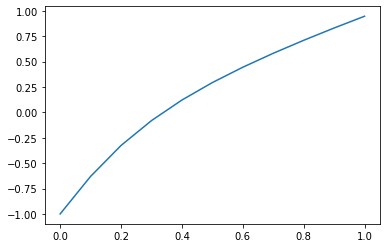

In [124]:
ts, sol = bde3(f, a, 1, yo, 1e-3, 10)
ts_rk, sol_rk = rk4(f, a, 1, yo, 10)
plt.plot(ts, sol)

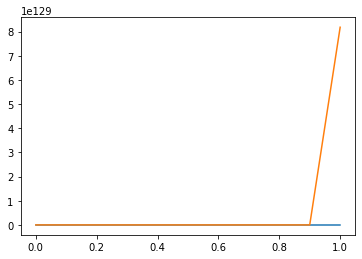

In [125]:
plt.plot(ts, abs(sol - exacta(ts)))
plt.plot(ts_rk, abs(sol_rk - exacta(ts_rk)))

### Tarea 12.5

Grafique la solución numérica a la siguiente ecuación diferencial, usando menos de 100 pasos

$$
y' = -30(y + y^2) + \sin(t/2)\,,\quad 0\leq t \leq 20\,,\quad y(0) = 0\,.
$$

In [430]:
def f(t, y):
    return -30*(y + y**2) + np.sin(0.5*t)

def df(t , y):
    return -30*(1 + 2*y)

a = 0
b = 20
yo = 0
tol = 1e-5
N = 100

Como la ecuación es rígida, usamos el método del trapecio

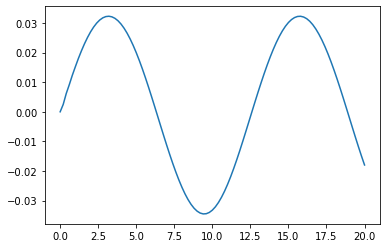

In [431]:
plt.plot(*tn(f, df, a, b, yo, tol, N))

Si no se usa el método del trapecio, se obtienen soluciones equivocadas, incluso cuando parecen estables, a menos que se usen muchos pasos.

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


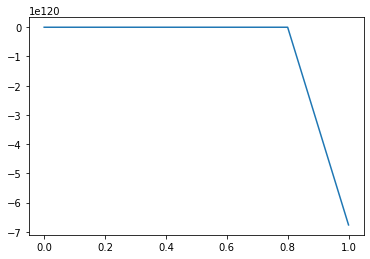

In [434]:
plt.plot(*rk4(f, a, b, yo, N))

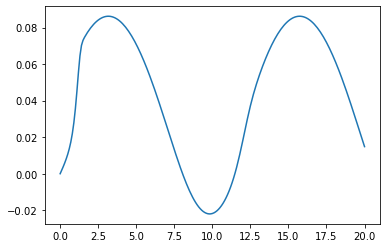

In [435]:
plt.plot(*rk4(f, a, b, yo, 200))

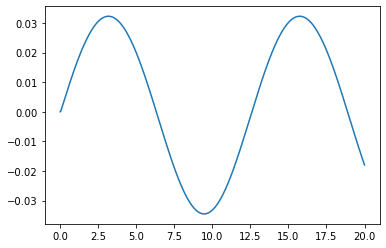

In [436]:
plt.plot(*rk4(f, a, b, yo, 1000))